/home/studio-lab-user/.conda/envs/d2l/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


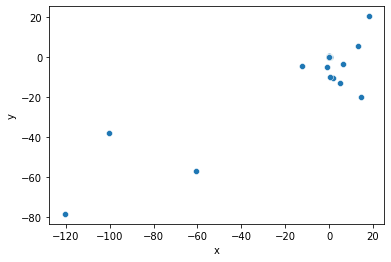

In [9]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# t-SNE t-Distributed Stocastic Neighbor Embedding
tSne = TSNE(n_components=2, perplexity=30, learning_rate="auto", n_iter=250,
            n_iter_without_progress=150, random_state=0, init='pca')

X = []
embeddings_dir = './'
with open(embeddings_dir + 'word_embeds.vec') as f:
    vocab_size, embedding_dim = f.readline().split(' ')
    for line in f.readlines():
        line = line.strip()
        coords = line.split(" ")
        embedding = coords[1:]
        embedding_coord_float = []
        for coord in embedding:
            embedding_coord_float.append(float(coord))
        X.append(embedding_coord_float)

X = np.array(X)
tsne_features = tSne.fit_transform(X)
x = tsne_features[:, 0]
y = tsne_features[:, 1]
#z = tsne_features[:, 2]

df = pd.DataFrame(dtype=np.float32)
df['x'] = x
df['y'] = y
#df['z'] = z

sns.scatterplot(x="x", y="y", data=df)
#ax = plt.axes(projection='3d')
#ax.scatter3D(x, y, z)
plt.show()
